### Connecting via psycopg2

In [3]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)# to set the columns to their maximum
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#import the data from a csv-file
df_import = pd.read_csv('data/eda.csv')

In [5]:
df_import

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,sales_id
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,1180.0,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,1
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,2170.0,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,2
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,770.0,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,3
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,1050.0,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,4
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,1680.0,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,8,1530.0,0.0,2009,0.0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0,21593
21593,6600060120,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,8,2310.0,0.0,2014,0.0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0,21594
21594,1523300141,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,7,1020.0,0.0,2009,0.0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0,21595
21595,291310100,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3,8,1600.0,0.0,2004,0.0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,400000.0,21596


In [6]:
#check the shape of your data
df_import.shape

(21597, 22)

In [7]:
# check the number of missing values per column
df_import.isna().sum()


id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
sales_id            0
dtype: int64

In [8]:
df_import[df_import['price'].isna()]

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,sales_id


In [9]:
df_import.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,sales_id
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19206.000000,21534.000000,21597.000000,21597.000000,21597.000000,21145.000000,21597.000000,17749.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007602,0.233863,3.409825,7.657915,1788.596842,291.857224,1970.999676,836.650516,98077.951845,47.560093,-122.213983,1986.620318,12758.283512,5.402966e+05,10799.000000
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086858,0.765686,0.650546,1.173200,827.759761,442.490863,29.375234,4000.110554,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05,6234.661218
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04,1.000000
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05,5400.000000
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05,10799.000000
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05,16198.000000
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,20150.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06,21597.000000


In [10]:
df_import['waterfront'].value_counts()

0.0    19060
1.0      146
Name: waterfront, dtype: int64

<AxesSubplot:>

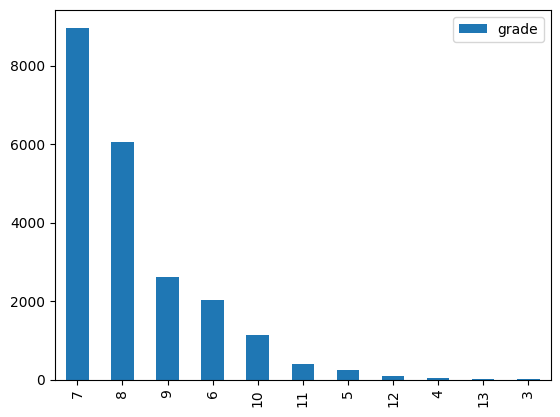

In [11]:
#check how many counts are in each of the grades first and then turn it into a data frame before you visualize it
df_import['grade'].value_counts()
pd.DataFrame(df_import['grade'].value_counts()).plot(kind='bar')

In [12]:
# make a copy of your dataframe
df2_import = df_import.copy()
# make a list column names
cols = df2_import.columns.tolist()
# replace space with _
cols = [col.replace(' ', '_') for col in cols]
# reassign new column names to dataframe
df2_import.columns = cols

In [13]:
#check the values in the waterfront
df_import.waterfront.unique()

array([nan,  0.,  1.])

In [14]:
# Notice the addition of the inplace argument here. 
# if you try to fill nans will some value: the first argument is the inserted value
df2_import.fillna(0, inplace=True)
# dropna() will drop the whole row, if nans are present
df2_import.dropna(inplace=True) 
df2_import.isna().sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date             0
price            0
sales_id         0
dtype: int64

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>],
       [<AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={

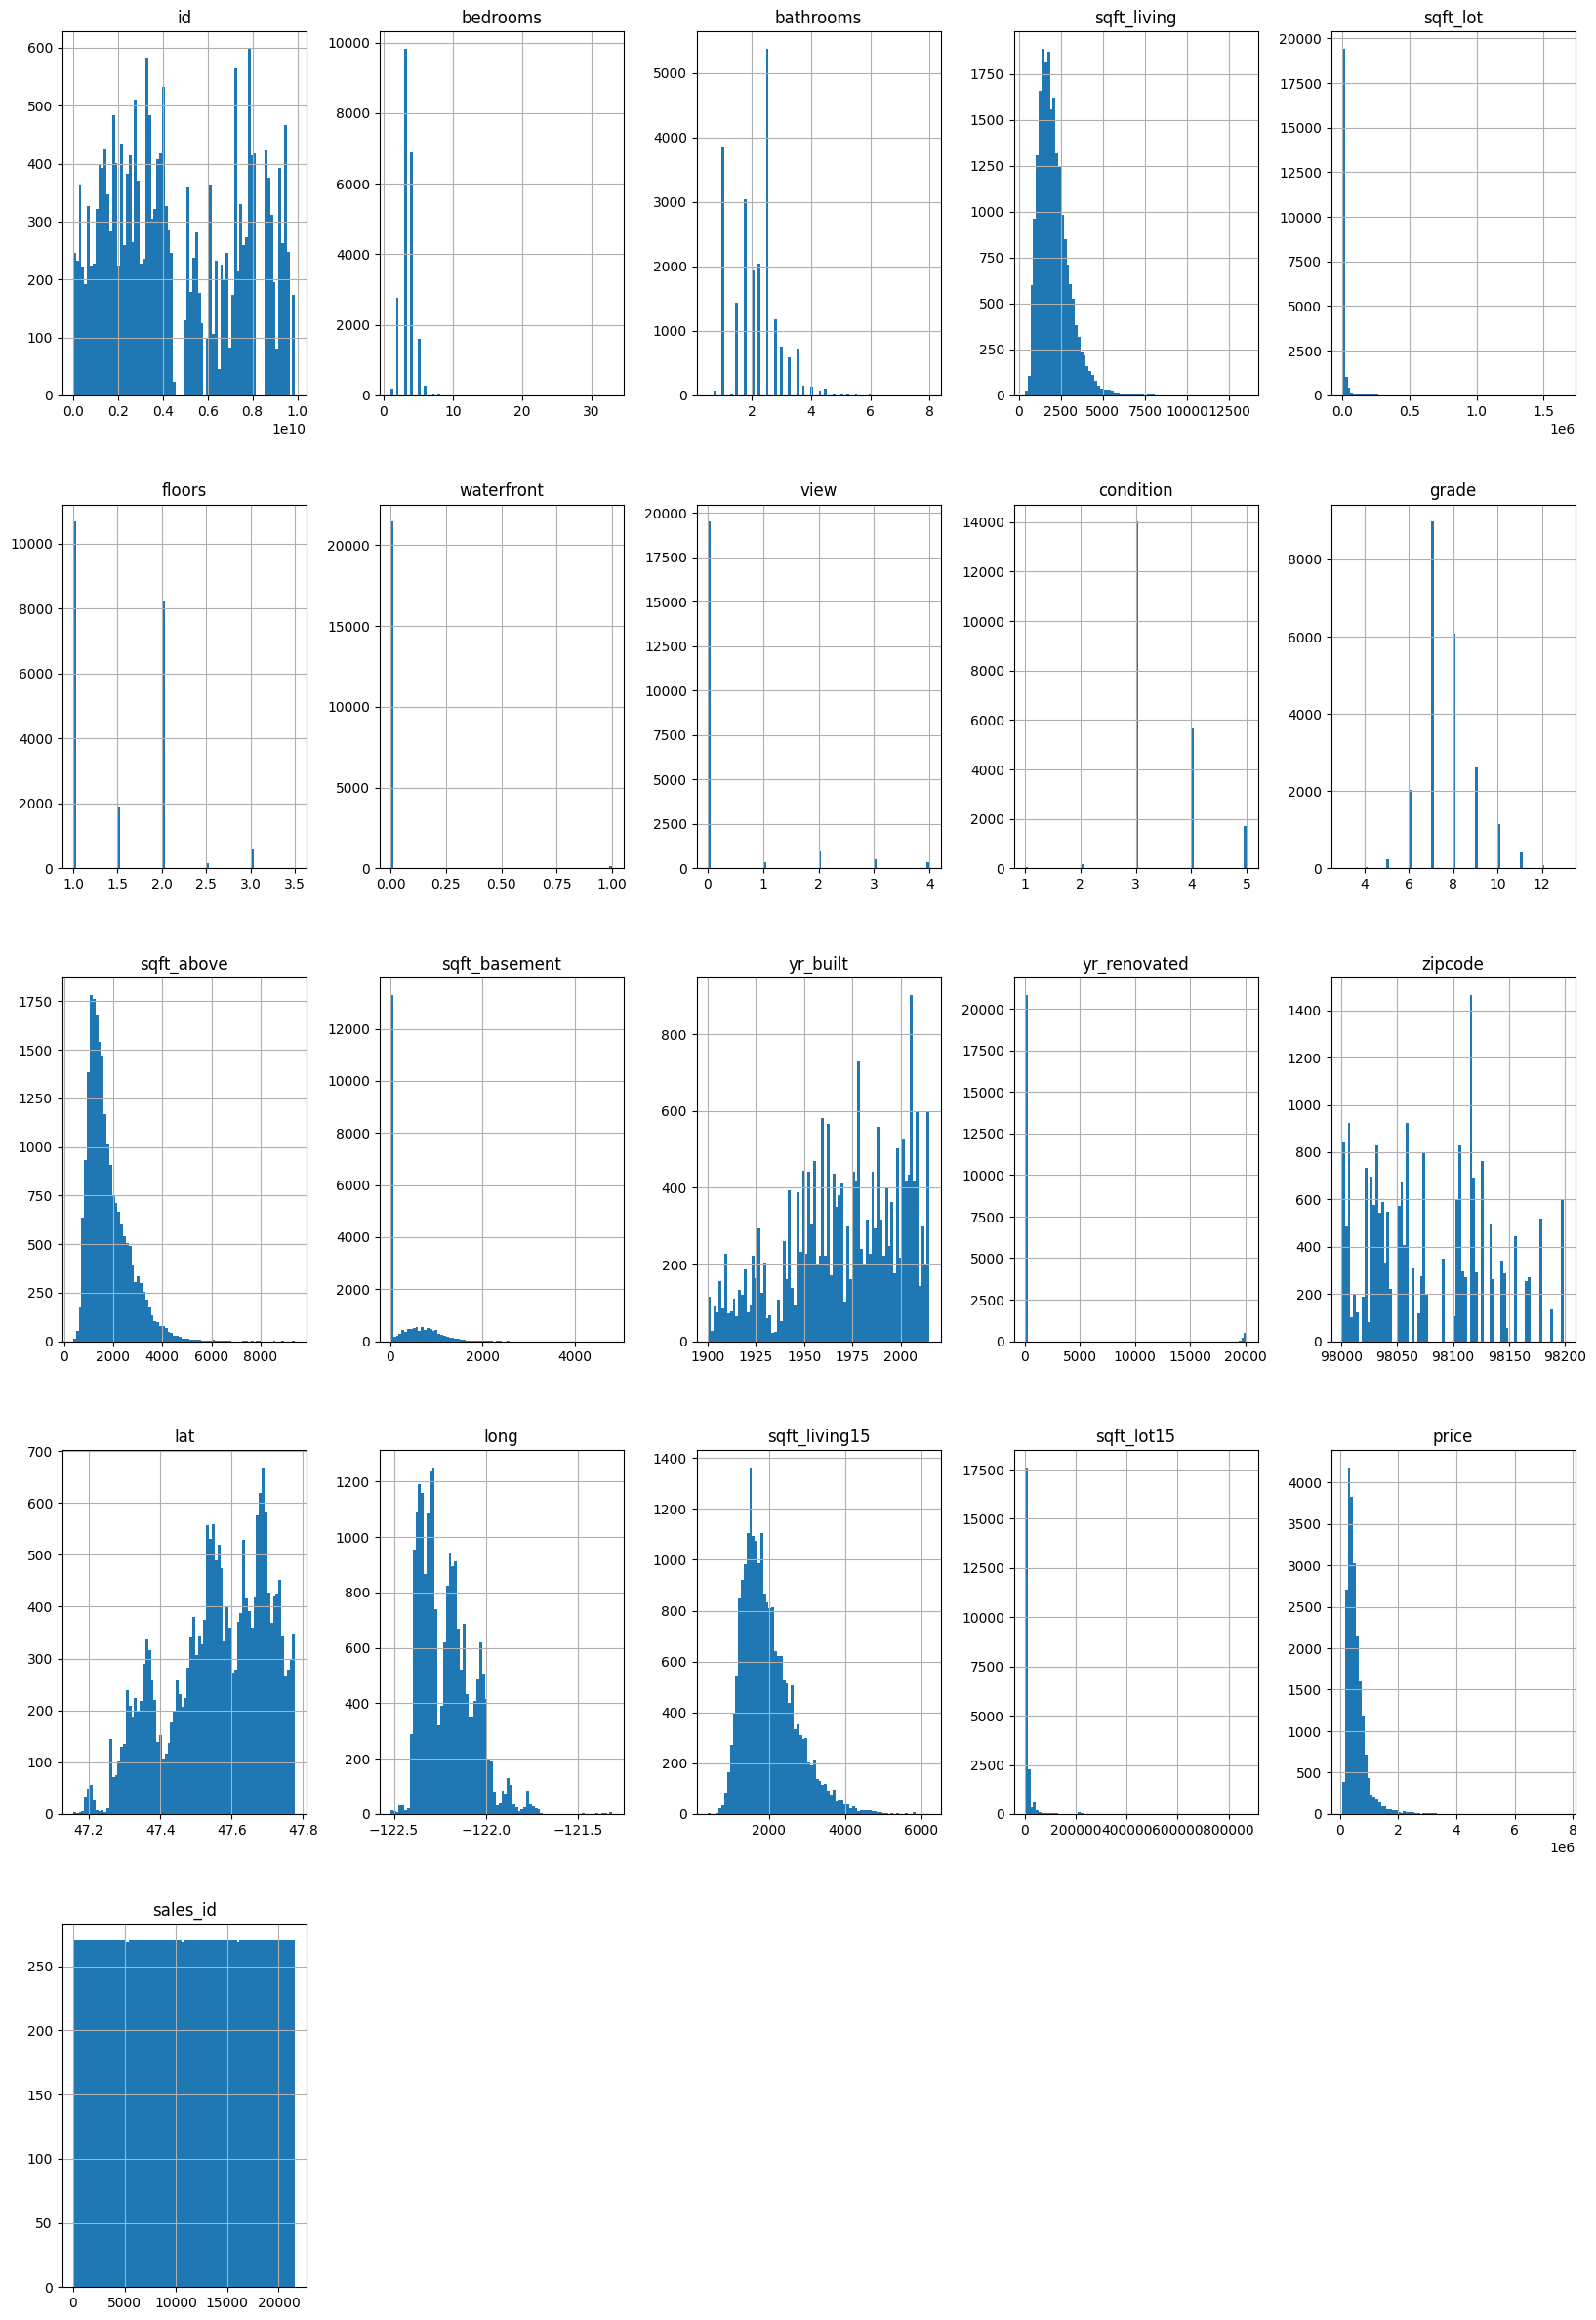

In [15]:
df2_import.hist(bins=80, figsize=(20,30))# curious to see the distribution of my data values

<AxesSubplot:ylabel='Frequency'>

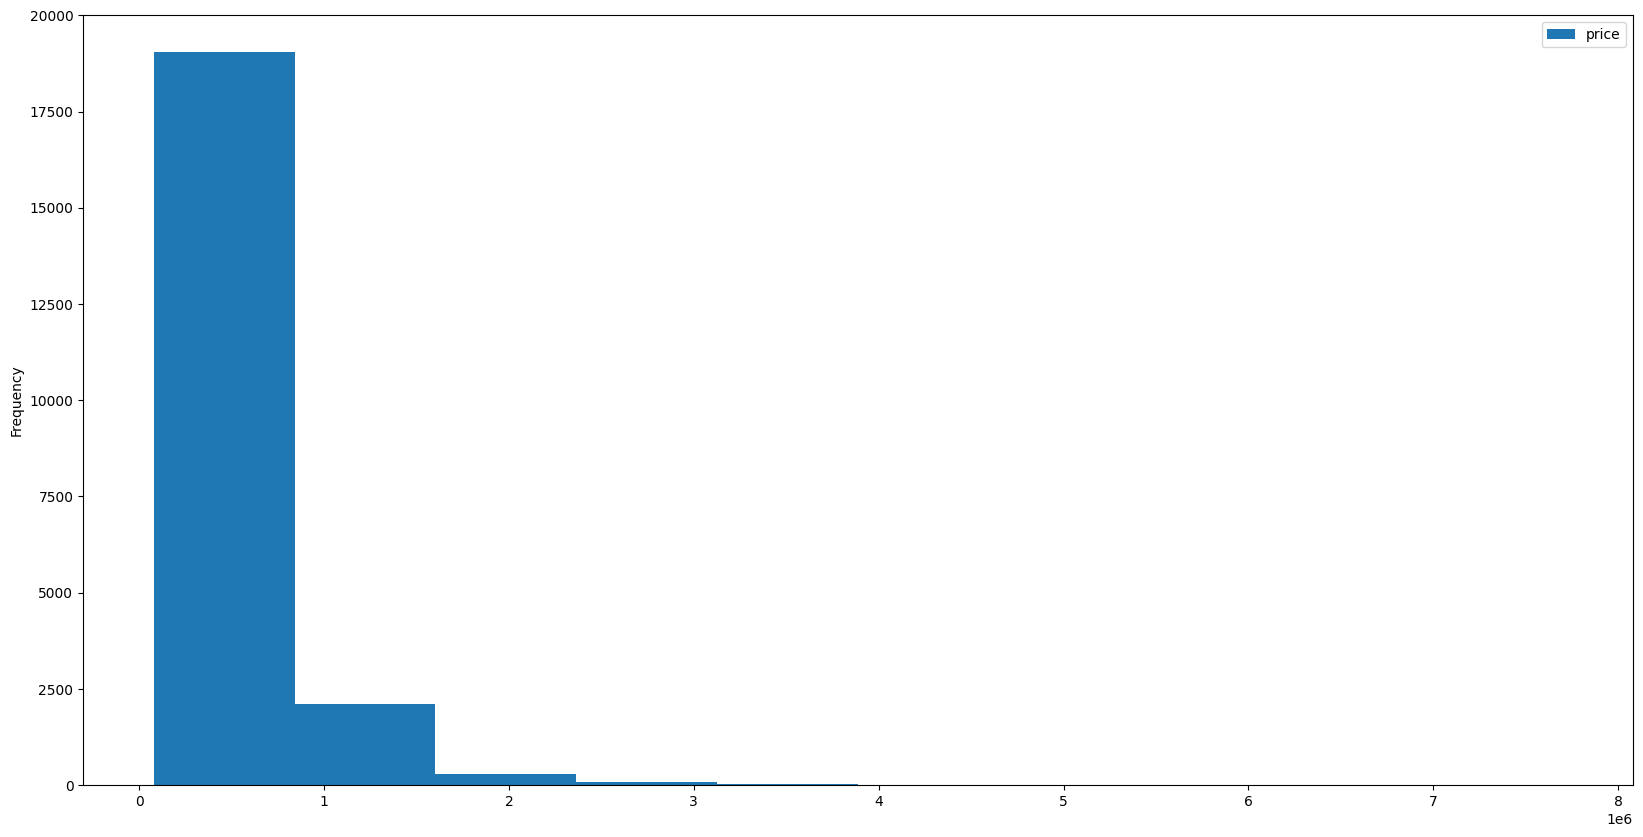

In [16]:
# to plot a particular section to have a feeling of what is going on
df_import[['price','grade']].plot(kind='hist', x='grade', y ='price', figsize=(20,10))

In [17]:
# to get all the rows where grade is highest
#df_import[df_import['grade']== 7]
df_import.query('grade== 7 and condition ==5 and bathrooms >= 4')

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,sales_id
7195,8901000143,4.0,4.5,2690.0,7350.0,1.5,0.0,0.0,5,7,2690.0,0.0,1949,0.0,98125,47.7062,-122.311,1660.0,9000.0,2014-11-25,500000.0,7196
8608,5379801972,5.0,4.0,1400.0,8580.0,1.0,0.0,0.0,5,7,900.0,500.0,1954,0.0,98188,47.4560,-122.292,1220.0,8832.0,2014-08-18,265000.0,8609
12401,6087100070,4.0,4.0,2290.0,6250.0,1.5,0.0,0.0,5,7,1690.0,600.0,1940,0.0,98116,47.5824,-122.384,1920.0,4335.0,2014-05-23,661254.0,12402
15346,1175000280,4.0,4.0,1550.0,6596.0,1.5,0.0,0.0,5,7,1550.0,0.0,1907,0.0,98107,47.6711,-122.398,1830.0,4850.0,2014-11-07,707500.0,15347


In [18]:
#check to zoom the missing values in the columns
incomplete_columns = df_import[['waterfront','yr_renovated', 'view', 'sqft_basement']]
incomplete_columns.apply(pd.Series.value_counts)

,waterfront,yr_renovated,view,sqft_basement
0.0,19060.0,17005.0,19422.0,12827.0
1.0,146.0,NaN,330.0,NaN
2.0,NaN,NaN,957.0,NaN
3.0,NaN,NaN,508.0,NaN
4.0,NaN,NaN,317.0,NaN
...,...,...,...,...
20110.0,NaN,9.0,NaN,NaN
20120.0,NaN,8.0,NaN,NaN
20130.0,NaN,31.0,NaN,NaN
20140.0,NaN,73.0,NaN,NaN


In [19]:
#replace null values in the columns to zeros
#df2_import['waterfront'].fillna(False, inplace=True) # used to test for df_import
#df2_import.loc[df2_import['waterfront']== 1, 'waterfront'] = True
#df2_import.loc[df2_import['waterfront']== 0, 'waterfront'] = False
df_import['sqft_basement'].fillna(0, inplace=True)
df_import['view'].fillna(0, inplace=True)
df_import['yr_renovated'].fillna(0, inplace=True)
df_import['waterfront'].fillna(0, inplace=True)
df_import.loc[df_import['waterfront']== 1, 'waterfront'] = True
df_import.loc[df_import['waterfront']== 0, 'waterfront'] = False
#df_import.loc[df_import['yr_renovated']== 0, 'yr_renovated'] = 0000


In [20]:
# check datatypes
df_import.dtypes

id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront        object
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
sales_id           int64
dtype: object

In [21]:
# let us convert all the date
df_import['date']=pd.to_datetime(df_import['date'],format='%Y/%m/%d')
#df_import['yr_renovated']=pd.to_datetime(df_import['yr_renovated'],format='%Y')
type(df_import['date'][20])
#type(df_import['yr_renovated'][20])

pandas._libs.tslibs.timestamps.Timestamp

In [22]:
# let us convert waterfront to boolean
df_import = df_import.astype({'waterfront': bool})

In [23]:
df_import['floors'].unique()


array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [24]:
# create dictionary called grade with grade as key and the actual category name as value
# we get these values from the Google API King county
grades = {
    3:'poor_quality',
    4:'lowest_quality',
    5:'lower_quality',
    6:'low_quality',
    7:'average',
    8:'above_average',
    9:'better',
    10:'high_quality',
    11:'higher_quality',
    12:'highest_quality',
    13:'highest_mansion',
}
df_import['grades'] = df_import['grade'].map(grades)
df_import[['waterfront','grades','grade']].head()


,waterfront,grades,grade
0,False,average,7
1,False,average,7
2,False,low_quality,6
3,False,average,7
4,False,above_average,8


In [25]:
#df_import_waterfront = df_import[df_import.waterfront== False]
#geo_map = px.scatter_geo (df_import, # Main argument: The Dataframe
                        #lat = "lat", # Y - Coordinate: Column from the df
                        #lon = "long", scope='north america' ,color='waterfront', hover_name='price', title='Geo_map_for my client')
#geo_map
#df_import_waterfront.head()

In [26]:
df_import.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'sales_id', 'grades'],
      dtype='object')

In [27]:
df_Jakob = df_import[['sales_id','sqft_living','sqft_lot','floors','bedrooms', 'bathrooms', 'waterfront','price','view','condition','grades','yr_built','zipcode', 'lat', 'long',]]

In [28]:
df_Jakob1 = df_Jakob[df_Jakob.bathrooms >= 4]
df_Jakob1

,sales_id,sqft_living,sqft_lot,floors,bedrooms,bathrooms,waterfront,price,view,condition,grades,yr_built,zipcode,lat,long
5,6,5420.0,101930.0,1.0,4.0,4.50,False,1230000.0,0.0,3,higher_quality,2001,98053,47.6561,-122.005
75,76,3430.0,35102.0,2.0,4.0,4.00,False,832500.0,0.0,4,high_quality,1986,98075,47.5822,-121.987
235,236,3760.0,28040.0,2.0,5.0,4.00,False,1030000.0,0.0,3,high_quality,1983,98033,47.6489,-122.183
270,271,5310.0,57346.0,2.0,4.0,4.75,False,1370000.0,0.0,4,higher_quality,1989,98077,47.7285,-122.042
300,301,4550.0,18641.0,1.0,4.0,5.00,True,3080000.0,4.0,3,high_quality,2002,98074,47.6053,-122.077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21504,21505,4920.0,50621.0,2.0,4.0,4.00,False,1410000.0,0.0,3,high_quality,2012,98053,47.6575,-122.006
21516,21517,4420.0,16526.0,2.0,4.0,4.00,False,1330000.0,0.0,3,higher_quality,2013,98075,47.5914,-122.027
21535,21536,4350.0,13405.0,2.0,5.0,4.50,False,1380000.0,0.0,3,higher_quality,2014,98074,47.6018,-122.060
21545,21546,4500.0,8130.0,2.0,5.0,4.00,False,750000.0,0.0,3,high_quality,2007,98059,47.4832,-122.145


In [29]:
import plotly.express as px

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df_Jakob1, 
                        lat="lat", 
                        lon="long", 
                        hover_name="waterfront", 
                        hover_data=['bedrooms', 'bathrooms','sqft_living','sqft_lot','floors'],
                        color="price",
                        #color_continuous_scale=color_scale,
                        #size="Listed",
                        color_continuous_scale=['green','red'],
                        zoom=10, 
                        height=800,
                        width=800)


fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [30]:
geo_map = px.scatter_geo (df_Jakob1, # Main argument: The Dataframe
                        lat = "lat", # Y - Coordinate: Column from the df
                        lon = "long", scope= 'usa',color='grades', hover_name='price', title='Geographical map of USA')
geo_map

From The geo_map; I can draw a hypothesis that 
*if a house has the best grades, then it has to have waterfront and big lot
*if a houses has big lots, then it must be in good condition
*The higher the floor of the house, the higher the price

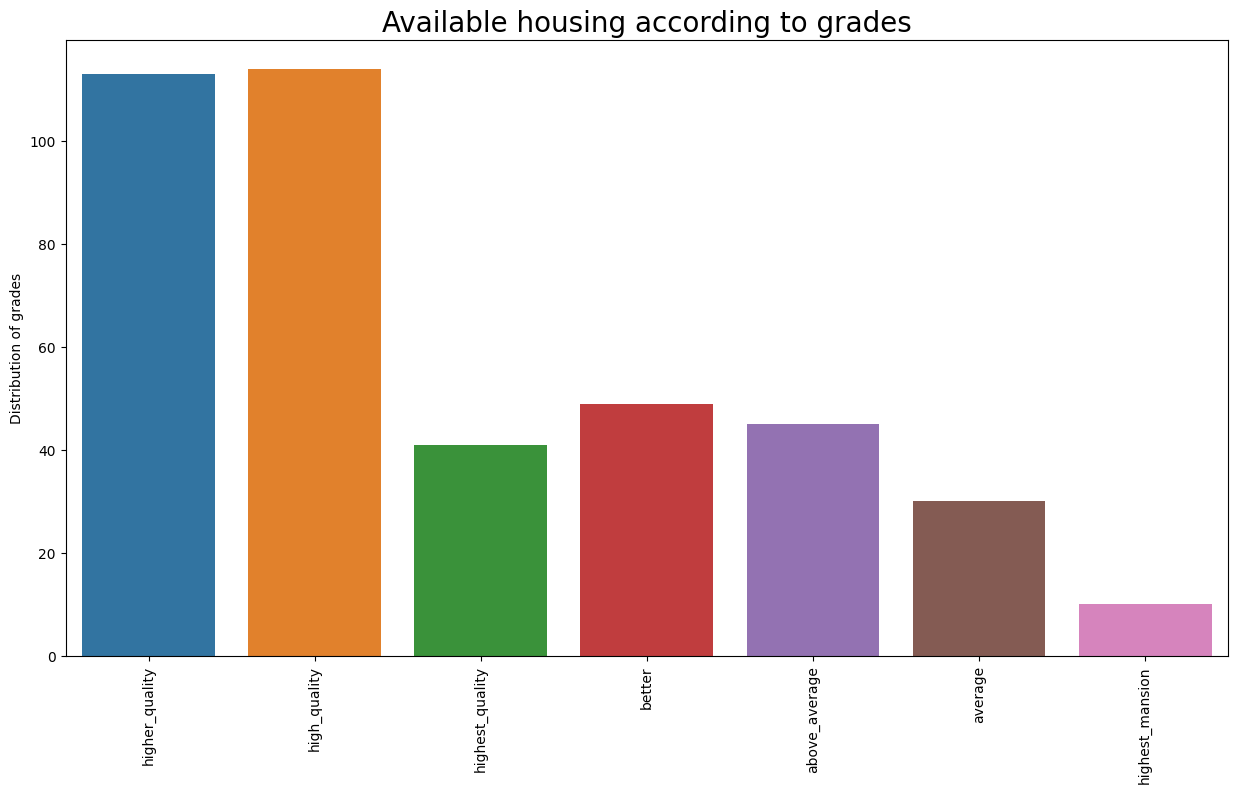

In [31]:
# Plot number of grades per category
plt.figure(figsize=(15,8)) # specify figure size
f1 = sns.countplot(x=df_Jakob1['grades']) # create countplot
f1.tick_params(axis='x', rotation=90) # get x-ticks and rotate them
f1.set(xlabel=None) # set no label for x-axis 
f1.set_ylabel("Distribution of grades", fontsize = 10); # set label for y-axis
f1.set_title('Available housing according to grades', fontsize=20); # set title

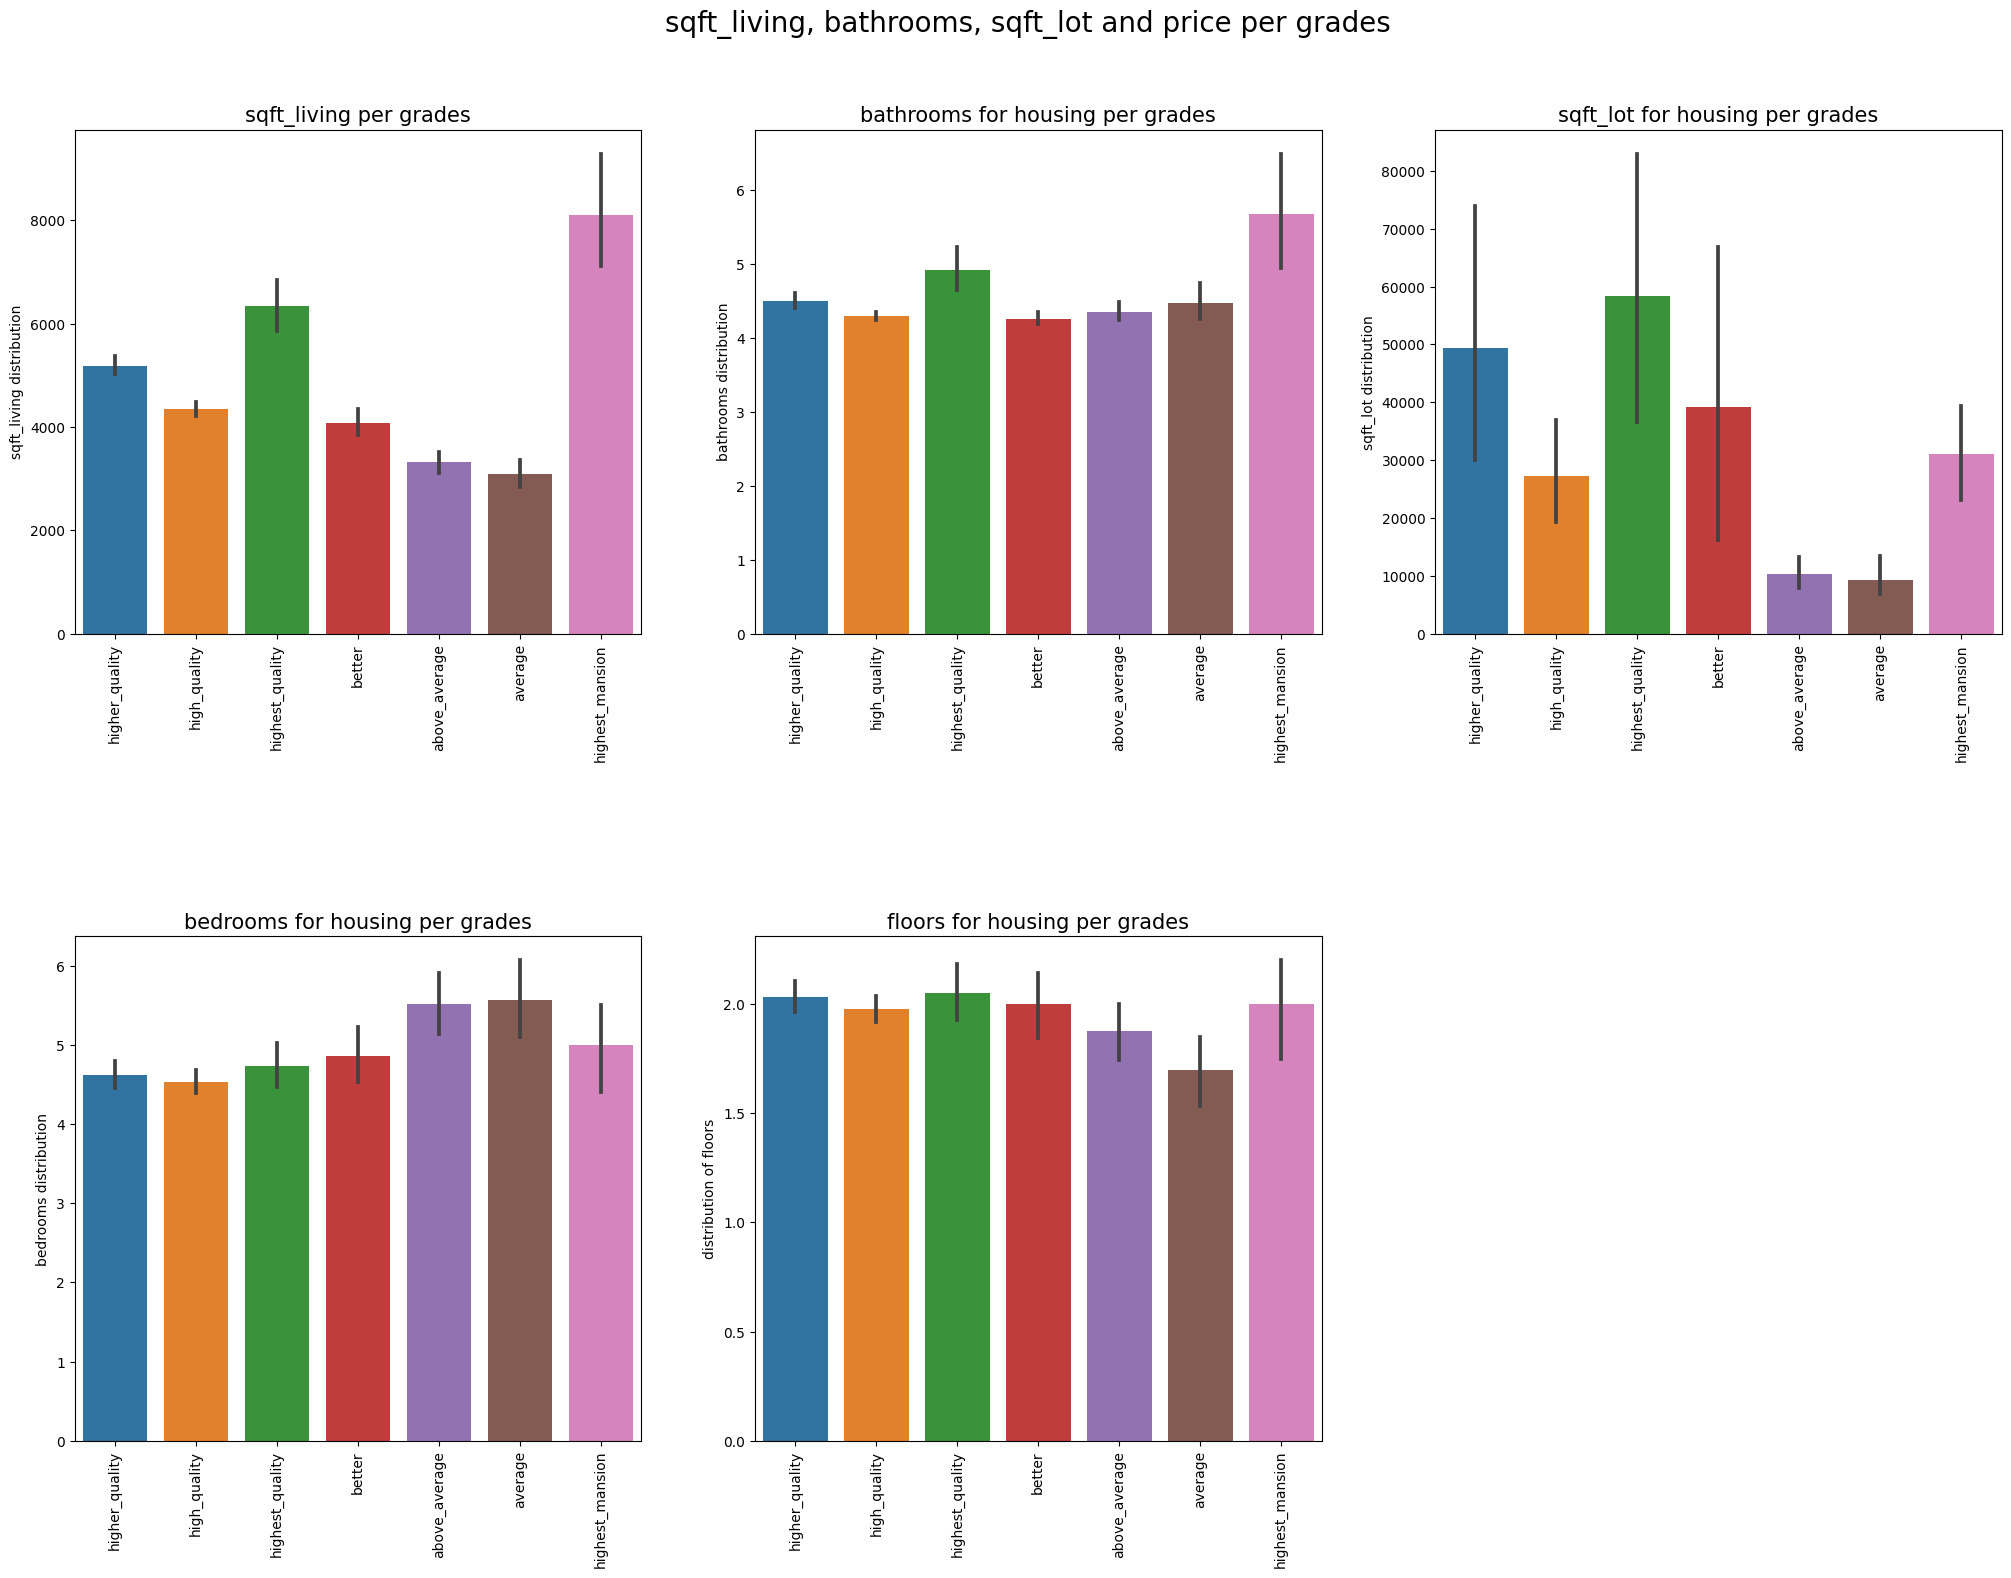

In [32]:
# Plot views, likes, dislikes and comments per category
fig, ax = plt.subplots(2,3, figsize=(20,15)) # create subplots on 2 rows and 2 columns
plt.suptitle('sqft_living, bathrooms, sqft_lot and price per grades', fontsize=20) 
fig.tight_layout()   # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .6, wspace = .2, top = .9) # adjusts the space between the single subplots

f1 = sns.barplot(x=df_Jakob1["grades"], y = df_Jakob1['sqft_living'], ax=ax[0,0]) # creates barchart for number of views
f1.tick_params(axis='x', labelrotation=90) # sets the label y-axis
f1.set(xlabel=None) # sets the x-axis label
f1.set_ylabel("sqft_living distribution", fontsize = 10) # limits the x-axis values from 0 to 1000000
f1.set_title("sqft_living per grades", fontsize = 15);  # sets title for subplot

f2= sns.barplot(x=df_Jakob1["grades"], y = df_Jakob1['bathrooms'], ax=ax[0,1])
f2.tick_params(axis='x', labelrotation=90)
f2.set(xlabel=None)
f2.set_ylabel("bathrooms distribution", fontsize = 10)
f2.set_title("bathrooms for housing per grades", fontsize = 15);

f3 = sns.barplot(x=df_Jakob1["grades"], y = df_Jakob1['sqft_lot'], ax=ax[0,2])
f3.tick_params(axis='x', labelrotation=90)
f3.set(xlabel=None)
f3.set_ylabel("sqft_lot distribution", fontsize = 10)
f3.set_title("sqft_lot for housing per grades", fontsize = 15);

f4 = sns.barplot(x=df_Jakob1["grades"], y = df_Jakob1['bedrooms'], ax=ax[1,0])
f4.tick_params(axis='x', labelrotation=90)
f4.set(xlabel=None)
f4.set_ylabel("bedrooms distribution", fontsize = 10)
f4.set_title("bedrooms for housing per grades", fontsize = 15);

f5 = sns.barplot(x=df_Jakob1["grades"], y = df_Jakob1['floors'], ax=ax[1,1])
f5.tick_params(axis='x', labelrotation=90)
f5.set(xlabel=None)
f5.set_ylabel("distribution of floors", fontsize = 10)
f5.set_title("floors for housing per grades", fontsize = 15);

fig.delaxes(ax[1][2]);

<AxesSubplot:xlabel='grades', ylabel='price'>

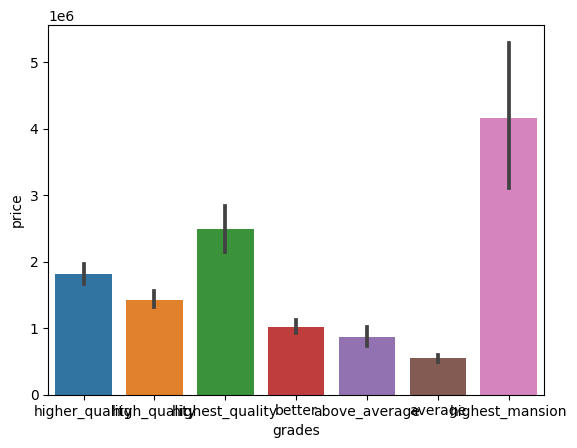

In [33]:
sns.barplot(x='grades', y ='price', data=df_Jakob1)

<AxesSubplot:xlabel='sqft_lot', ylabel='grades'>

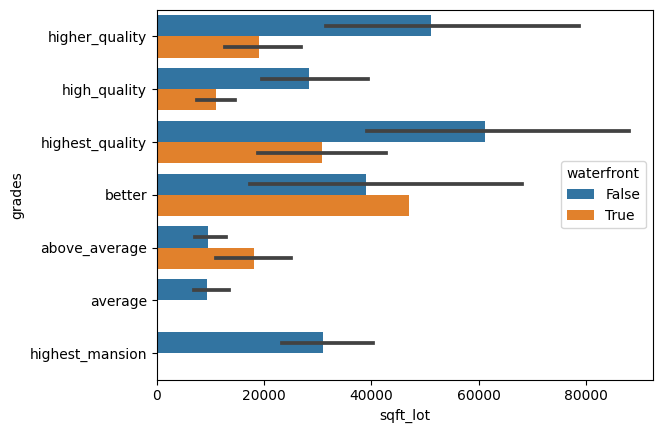

In [34]:
sns.barplot(x='sqft_lot', y= 'grades', data=df_Jakob1, hue='waterfront') # the higher sqft_lot has both higher quality and waterfront. my buyer doesnot need to buy a highest mansion

My hypothesis of house being the best grades with waterfront has been proven wrong as the house with highest quality grade has waterfront as well as big lot

<AxesSubplot:xlabel='floors', ylabel='sqft_lot'>

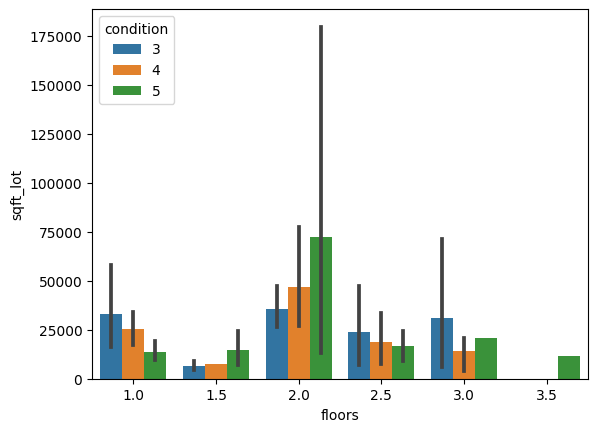

In [35]:
sns.barplot(x='floors', y= 'sqft_lot', data=df_Jakob1, hue ='condition') #an average condition has the highest lot size

In [36]:
df_Jakob1.columns

Index(['sales_id', 'sqft_living', 'sqft_lot', 'floors', 'bedrooms',
       'bathrooms', 'waterfront', 'price', 'view', 'condition', 'grades',
       'yr_built', 'zipcode', 'lat', 'long'],
      dtype='object')

<AxesSubplot:xlabel='grades', ylabel='floors'>

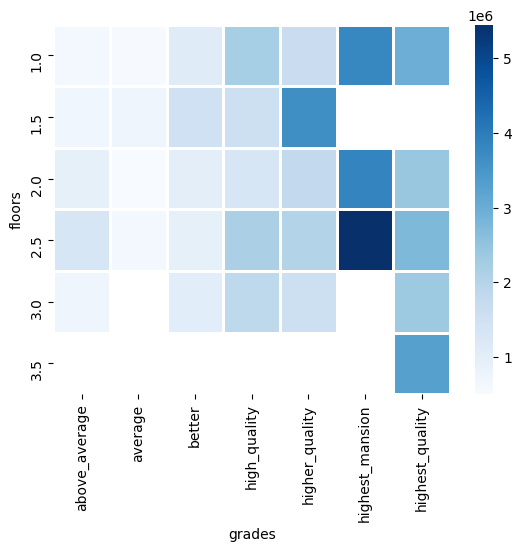

In [37]:
#The higher the floor of the house, the higher the price
df_floor= df_Jakob1[['price','grades','floors']]
df_floor = df_floor.pivot_table(index ='floors', columns='grades', values='price')
#df_floor[df_floor['floors'].isna()]
#df_import[df_import['bathrooms'].isna()]
df_floor
#df_floor['floors'].fillna(0, inplace=True)
sns.heatmap(df_floor, cmap='Blues', linecolor='white', linewidth=1)

<AxesSubplot:xlabel='floors', ylabel='price'>

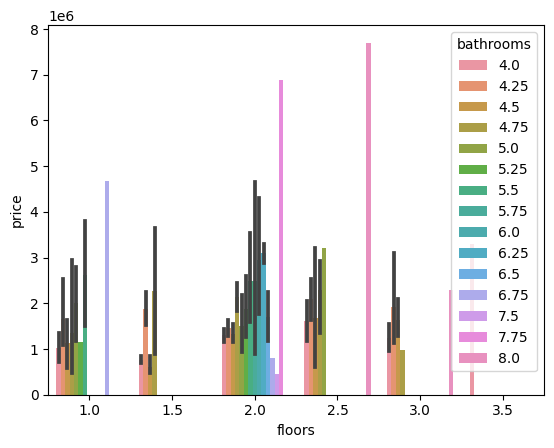

In [38]:
sns.barplot(x='floors', y= 'price', data=df_Jakob1, hue ='bathrooms')

In [39]:
df_import['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [40]:

df2_Jakob=df_Jakob1[(df_Jakob1['condition']== 5) & (df_Jakob1['waterfront'] == False) ]
df2_Jakob

,sales_id,sqft_living,sqft_lot,floors,bedrooms,bathrooms,waterfront,price,view,condition,grades,yr_built,zipcode,lat,long
779,780,4860.0,9453.0,1.5,5.0,4.25,False,2250000.0,1.0,5,high_quality,1905,98112,47.6196,-122.286
2018,2019,3600.0,14720.0,1.0,5.0,4.00,False,835000.0,2.0,5,above_average,1960,98034,47.7022,-122.227
4312,4313,3500.0,8750.0,1.0,4.0,4.25,False,1080000.0,4.0,5,better,1951,98177,47.7222,-122.367
4470,4471,4380.0,42769.0,2.0,3.0,4.00,False,1050000.0,0.0,5,higher_quality,1983,98052,47.7167,-122.109
5444,5445,5040.0,17208.0,1.0,4.0,4.00,False,2850000.0,0.0,5,high_quality,1976,98006,47.5701,-122.188
5844,5845,4720.0,21000.0,3.0,4.0,4.25,False,1530000.0,4.0,5,higher_quality,1971,98177,47.7591,-122.376
7184,7185,6210.0,8856.0,2.5,7.0,4.50,False,3200000.0,2.0,5,higher_quality,1910,98109,47.6307,-122.354
7195,7196,2690.0,7350.0,1.5,4.0,4.50,False,500000.0,0.0,5,average,1949,98125,47.7062,-122.311
8608,8609,1400.0,8580.0,1.0,5.0,4.00,False,265000.0,0.0,5,average,1954,98188,47.4560,-122.292
9343,9344,3530.0,8400.0,2.0,4.0,4.00,False,1100000.0,0.0,5,above_average,1958,98199,47.6402,-122.395


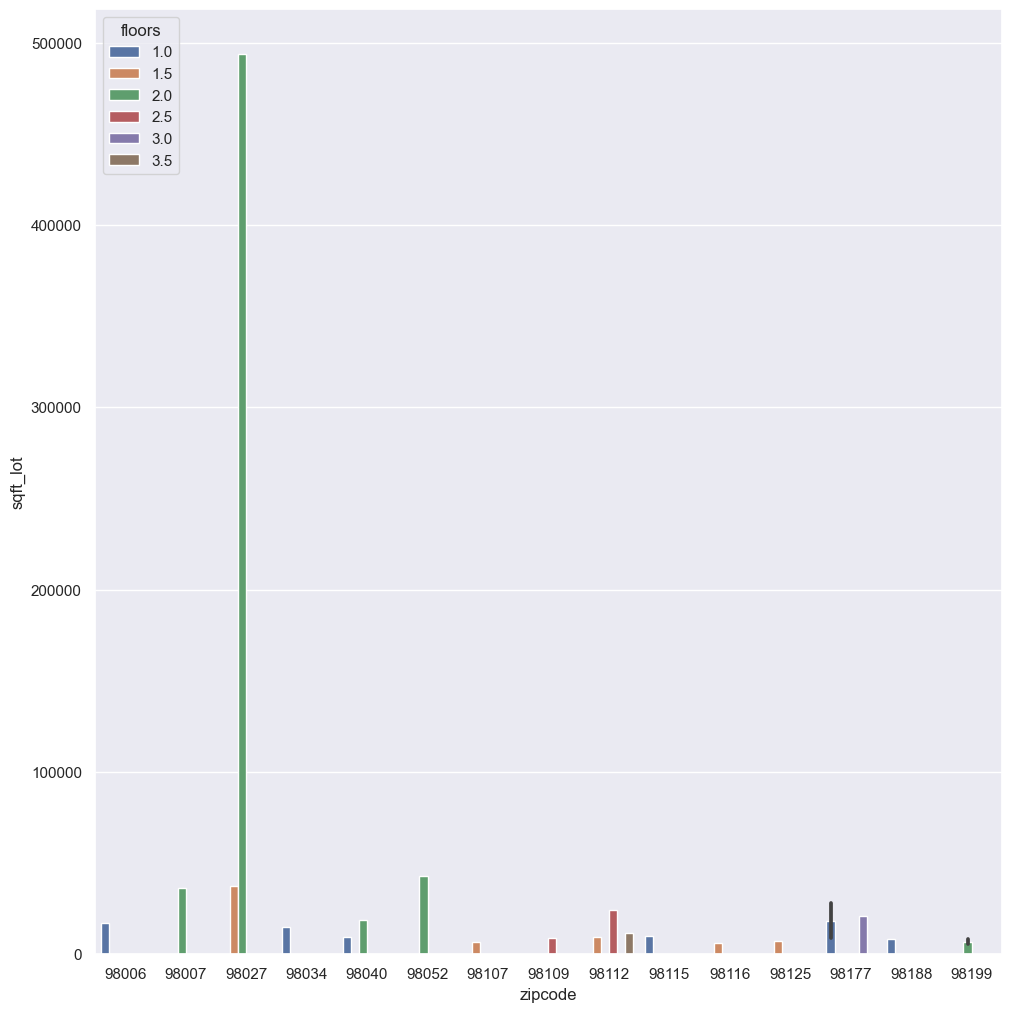

In [49]:
sns.barplot(x='zipcode', y= 'sqft_lot', data=df2_Jakob, hue='floors')
sns.set(rc={'figure.figsize':(11.7,12.27)})
plt.yticks();
plt.xticks();

In [42]:
df3_Jakob=df_Jakob1[(df_Jakob1['sqft_lot'] >400000) & (df_Jakob1['zipcode'] == 98027) ]
df3_Jakob

,sales_id,sqft_living,sqft_lot,floors,bedrooms,bathrooms,waterfront,price,view,condition,grades,yr_built,zipcode,lat,long
19076,19077,4720.0,493534.0,2.0,5.0,4.0,False,745000.0,0.0,5,better,1975,98027,47.4536,-122.009


<AxesSubplot:xlabel='zipcode', ylabel='price'>

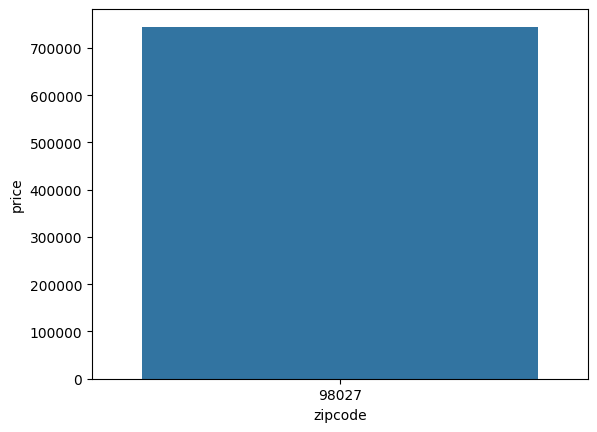

In [43]:
sns.barplot(x='zipcode', y= 'price', data=df3_Jakob)